# Script for studying the use of graphs in python:

In [3]:
import numpy as np
from random import uniform,randint
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import networkx as nx
from time import sleep
import pandas as pd

In [4]:
from modules.distances import l1dist, l2dist, distgraph,distgraphl1,distgraphmaha
from modules.graphs import getgraph

In [3]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0
npoints = 15
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [4]:
for i in range(npoints):
    node[i] = int(i)
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

L2= 46.5715040402 4.47095000365
L1= 21.8491496293 4.47095000365
Maha= 1e+20 4.47095000365


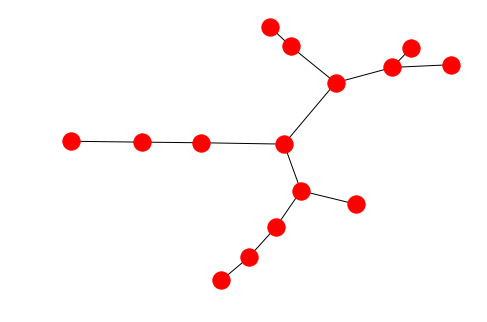

In [16]:
#Test for checking the functionality of the getgraph function
M = np.array((x,y))
G,TSG = getgraph(M)
nx.draw(TSG)

#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(M)
print('L2=', phi1, dmst1)

phi2, dmst2 = distgraphl1(M)
print('L1=',phi2, dmst2)

phi3, dmst3 = distgraphmaha(M)
print('Maha=', phi3, dmst3)

In [15]:
#TEST FOR MAHALANOBIS DISTANCE
M = np.array( (x,y) )
C = np.cov( M.T )
IC = np.eye(20)
invC = np.linalg.inv(C)

In [ ]:
#TEST FOR MAHALANOBIS DISTANCE
mahalanobis(x,y,invC)

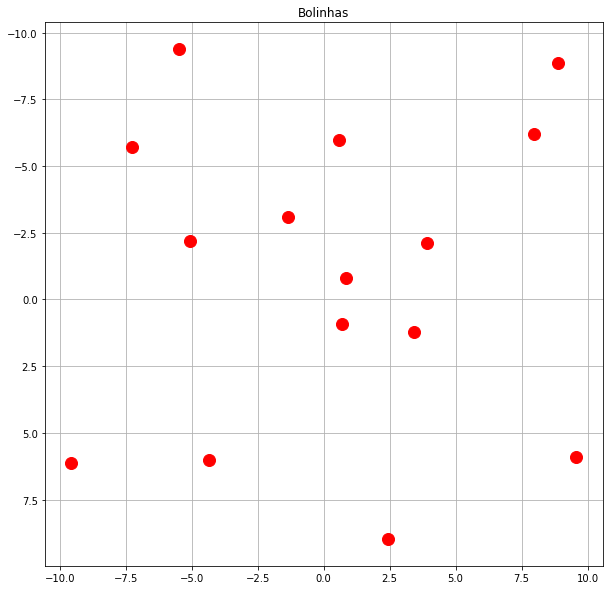

In [17]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
p1 = plt.plot(x, y, 'or' , markersize=12 )

plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [18]:
pos={'x':x, 'y':y}
type(pos)

dict

In [19]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i ,pos=(x[i],y[i]))
    for j in range(npoints):
        M1 = np.array((x[i],y[j]) )
        C1 = np.cov(M1.T)
        C1 = np.zeros((1,1))
        invC1 = np.zeros((1,1))
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])
#nx.set_node_attributes(S, 'X_Y', pos)
TS = nx.minimum_spanning_tree(S)

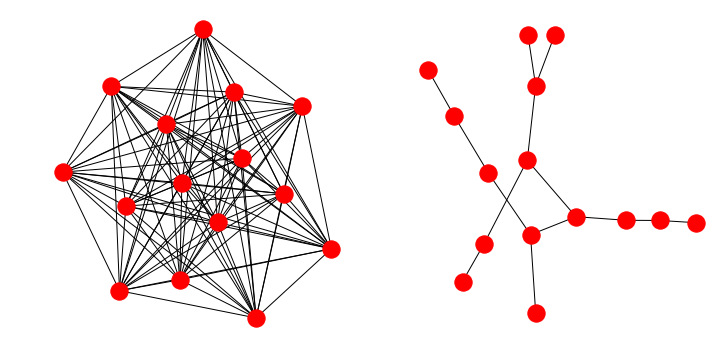

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

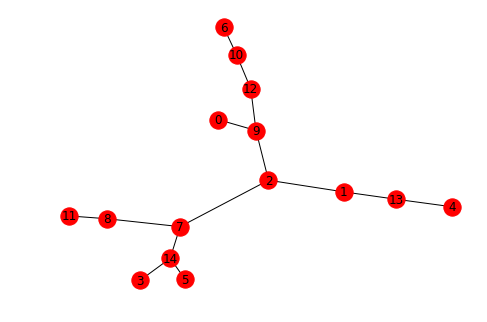

In [21]:
#TENTANDO COLOCAR LABELS NOS VERTICES
nx.draw(TS, with_labels = True)
plt.savefig('labels.png')

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [22]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(M)
print('L2=', phi1, dmst1)

phi2, dmst2 = distgraphl1(M)
print('L1=',phi2, dmst2)

phi3, dmst3 = distgraphmaha(M)
print('Maha=', phi3, dmst3)

L2= 46.5715040402 4.47095000365
L1= 21.8491496293 4.47095000365
Maha= 1e+20 4.47095000365


0 9 3.47646877608
1 2 3.33828449298
1 13 5.75671937481
2 7 1.74000903316
2 9 3.14744427267
3 14 5.22304832884
4 13 2.8237270297
5 14 7.41776989888
6 10 4.07033960897
7 8 2.73775313903
7 14 7.16022035088
8 11 7.72156687948
9 12 3.8348808413
10 12 4.14506802424


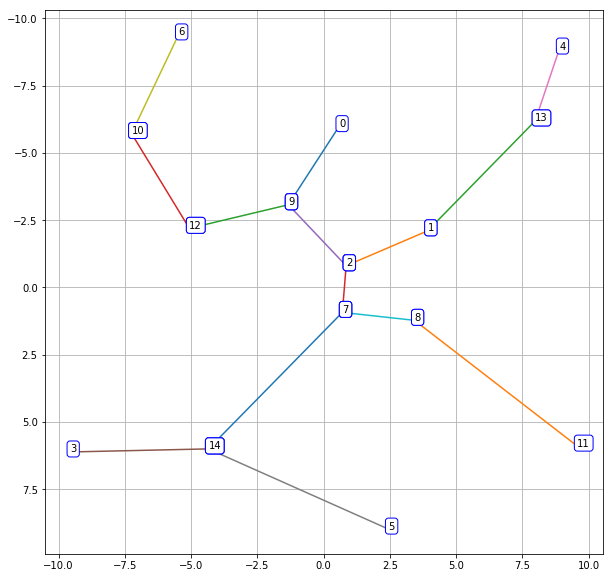

In [23]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
u = []
v = []
for (i, j, d) in TS.edges.data('weight'):
    print(i,j,d)
    u.append(x[i])
    v.append(y[j])
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    plt.annotate( int(node[i]), xy=(x[i],y[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(x[j],y[j]) , bbox=bbox_props)
    plt.plot(xt,yt,'.-')
plt.grid()
p1 = plt.plot(x, y, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>

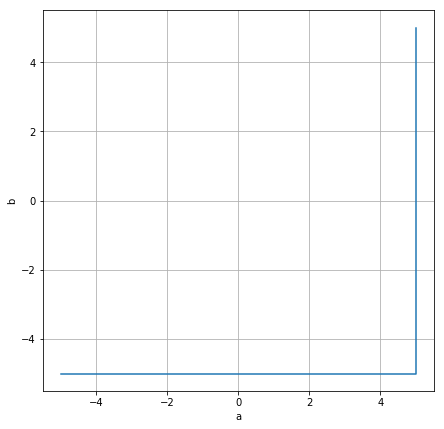

In [26]:
#PLOTA UM L PARA TESTAR A FUNCAO DISTGRAPH E O NETWORKX
ax = np.linspace(-5,5,npoints)
ay = np.zeros(npoints-1)
ay = 5 + ay
by = np.linspace(-5 + 2*5/(npoints-1),5,npoints-1)
bx = np.zeros(npoints)
bx = -5 + bx

a = np.zeros(2*npoints - 1)
b = np.zeros(2*npoints - 1)

for i in range(0, npoints):
    a[i] = ax[i]
for i in range(npoints, 2*npoints - 1 ):
    a[i] = ay[i - npoints]

for i in range(0, npoints):
    b[i] = bx[i] 
for i in range(npoints, 2*npoints - 1):
    b[i] = by[i - npoints]
L = (a,b)
plt.figure(figsize=(7,7),facecolor='w')
plt.plot(a,b)
plt.xlabel('a')
plt.ylabel('b')
plt.grid()
plt.show()

In [27]:
Sl = nx.Graph()
for i in range(2*npoints-1):
    Sl.add_node(i ,pos=(L[0][i],L[1][i]))
    for j in range(2*npoints-1):
        Sl.add_edge(i,j,weight=l2dist(a,b)[i][j])
TSl = nx.minimum_spanning_tree(Sl)

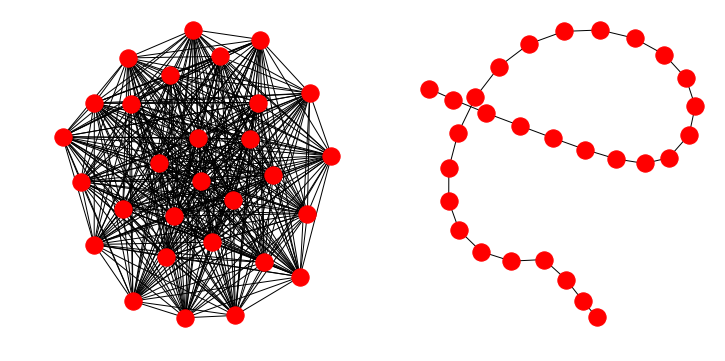

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sl)
plt.subplot(122)
nx.draw(TSl)
plt.show()

In [29]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(L)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(L)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(L)
print('Maha=', phi3, dmst3)

L2= 8.23373569824e-30 0.714285714286
L1= 9.99200722163e-15 0.714285714286
Maha= 2.67261241868e-05 0.714285714286


In [30]:
node1 = np.zeros(2*npoints-1)
for i in range(2*npoints-1):
    node1[i] = int(i)

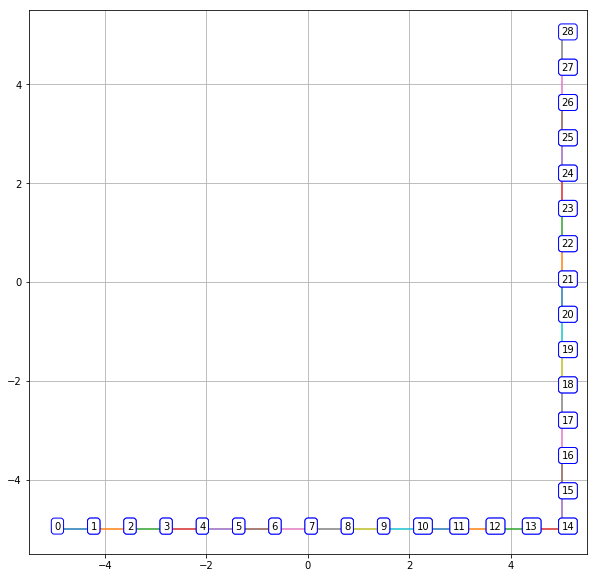

In [31]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSl.edges.data('weight'): 
    at = [ a[i], a[j] ]
    bt = [ b[i], b[j] ]
    plt.annotate( int(node1[i]), xy=(a[i],b[i]) , bbox=bbox_props)
    plt.annotate( int(node1[j]), xy=(a[j],b[j]) , bbox=bbox_props)
    plt.plot(at,bt,'.-')
plt.grid()
p1 = plt.plot(a,b, 'ko', marker='o' )
#plt.savefig('L2dist.pdf')
#plt.gca().invert_yaxis()
plt.show()

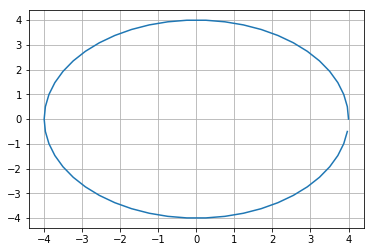

In [32]:
i = 1j
r = 4.0
theta = np.linspace(0,2*np.pi,50,endpoint=False)
circle = r*np.exp(i*theta)
node = np.arange(0,51)
plt.plot(circle.real,circle.imag)
plt.grid()
plt.show()
C = (circle.real,circle.imag)

In [33]:
Sc = nx.Graph()
for i in range(50):
    for j in range(i,50):
        Sc.add_edge(i,j,weight=l2dist(circle.real,circle.imag)[i][j])
TSc = nx.minimum_spanning_tree(Sc)

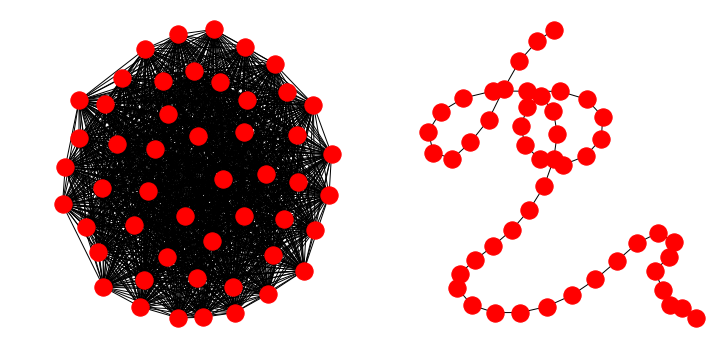

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sc)
plt.subplot(122)
nx.draw(TSc)
plt.show()

In [35]:
#Calculating the phi funtcion and the mean
phi1, dmst1 = distgraph(C)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(C)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(C)
print('Maha=', phi3, dmst3)

L2= 4.7479565733e-29 0.502324156235
L1= 3.68594044176e-14 0.502324156235
Maha= 2.47274578121e-05 0.502324156235


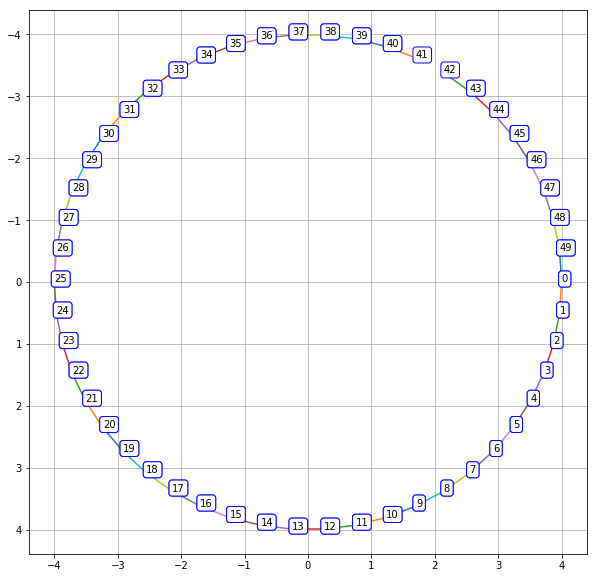

In [36]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
c = 0
for (i, j, d) in TSc.edges.data('weight'):
    xct = [ circle.real[i], circle.real[j] ]
    yct = [ circle.imag[i], circle.imag[j] ]
    plt.annotate( int(node[i]), xy=(circle.real[i],circle.imag[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(circle.real[j],circle.imag[j]) , bbox=bbox_props)
    plt.plot(xct,yct,'.-')
plt.grid()
p1 = plt.plot(circle.real, circle.imag, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [37]:
## Sorting point masses into the 2D space:
npoints = 10
yl = np.zeros(npoints)
xl = np.linspace(0,10,npoints,endpoint=True)
R = (xl,yl)

In [38]:
node2 = np.zeros(npoints)
for i in range(npoints):
    node2[i] = int(i)

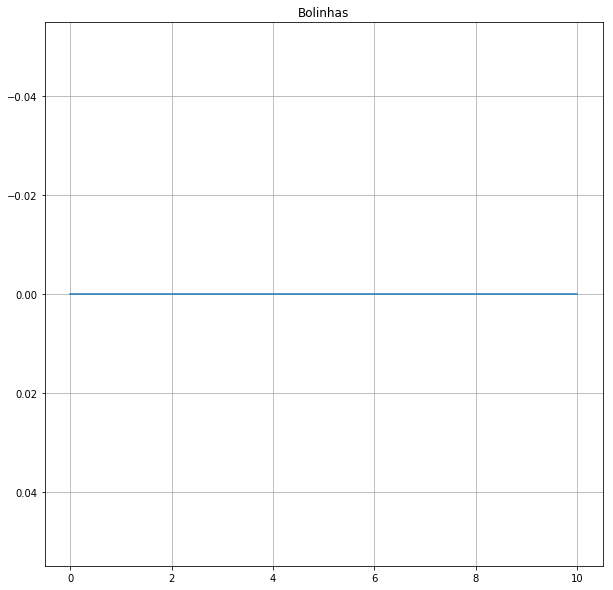

In [39]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
#plt.plot(x1, y1, 'or' , markersize=12 )
#plt.plot(x2, y2, 'ob' , markersize=12 )
plt.plot(xl,yl)
plt.title('Bolinhas')
plt.grid()

#plt.xlim( min(x1)-1.0, max(x1)+1.0 )
#plt.ylim( min(y1)-1.0, max(y1)+1.0 )

plt.gca().invert_yaxis()
#plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [40]:
Sl = nx.Graph()
for i in range(npoints):
    for j in range(npoints):
        Sl.add_edge(i,j,weight=l2dist(xl,yl)[i][j])  #WEIGTH IS GIVEN BY THE EUCLIDIAN'S NORM
TSl = nx.minimum_spanning_tree(Sl)

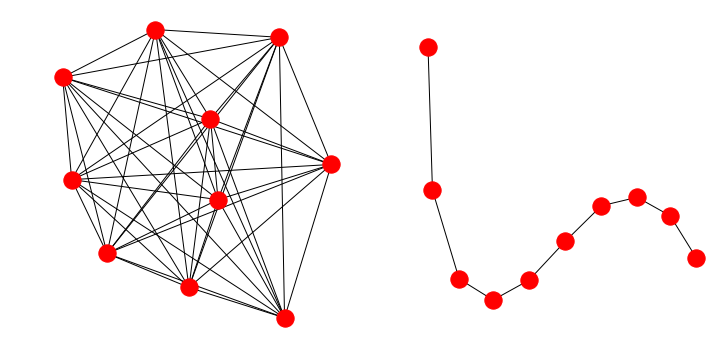

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sl)
plt.subplot(122)
nx.draw(TSl)
plt.show()

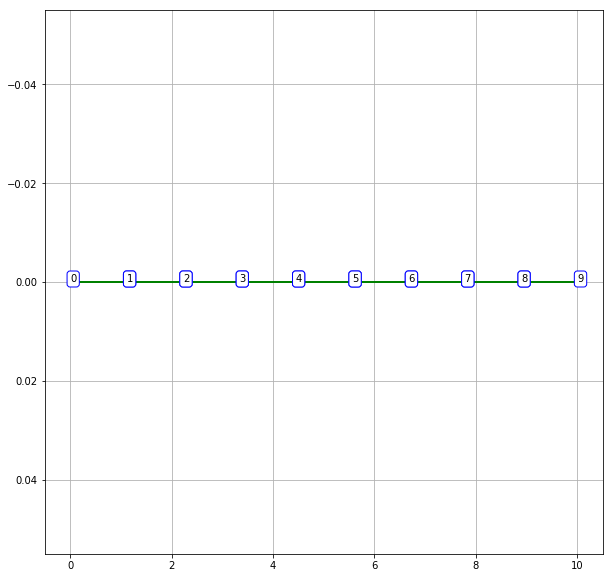

In [43]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSl.edges.data('weight'):
    xctl = [ xl[i], xl[j] ]
    yctl = [ yl[i], yl[j] ]
    plt.annotate( int(node2[i]), xy=(xl[i],yl[i]) , bbox=bbox_props)
    plt.annotate( int(node2[j]), xy=(xl[j],yl[j]) , bbox=bbox_props)
    plt.plot(xl,yl,'.-g')
plt.grid()
p1 = plt.plot(xl,yl, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [54]:
#Calculating the phi funtcion and the mean
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(R)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(R)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(R)
print('Maha=', phi3, dmst3)

L2= 9.86076131526e-31 1.11111111111
L1= 2.22044604925e-15 1.11111111111
Maha= 3.33333333251e-05 1.11111111111


# TODO: DESLOCAR 1 VERTICE PARA LONGE E CALCULAR AS 3 DISTANCIAS UTILIZADAS. VERIFICAR QUAL FOI A MAIS SENSIVEL

In [44]:
## Sorting point masses into the 2D space:
npoints = 10
yld = np.zeros(npoints)
xld = np.linspace(0,10,npoints,endpoint=True)
for i in range(len(xld)):
    if i == 0:
        xld[i] = -10
Rd = (xld,yld)

In [45]:
node2 = np.zeros(npoints)
for i in range(npoints):
    node2[i] = int(i)

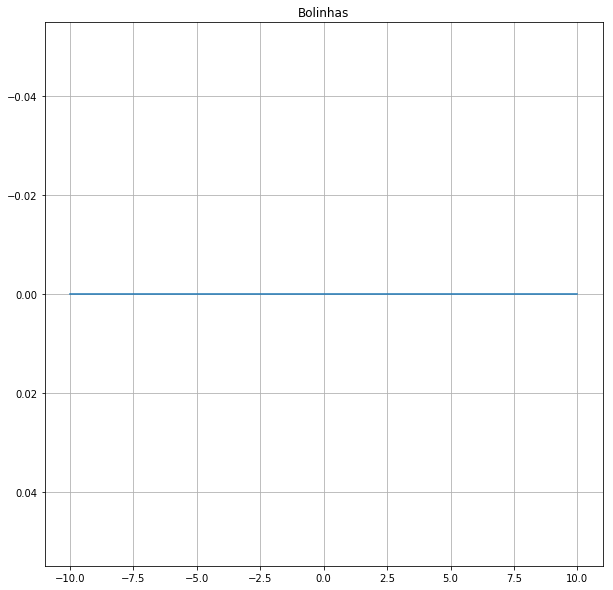

In [46]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
#plt.plot(x1, y1, 'or' , markersize=12 )
#plt.plot(x2, y2, 'ob' , markersize=12 )
plt.plot(xld,yld)
plt.title('Bolinhas')
plt.grid()

#plt.xlim( min(x1)-1.0, max(x1)+1.0 )
#plt.ylim( min(y1)-1.0, max(y1)+1.0 )

plt.gca().invert_yaxis()
#plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [47]:
Sld = nx.Graph()
for i in range(npoints):
    for j in range(npoints):
        Sld.add_edge(i,j,weight=l2dist(xld,yld)[i][j])  #WEIGTH IS GIVEN BY THE EUCLIDIAN'S NORM
TSld = nx.minimum_spanning_tree(Sld)

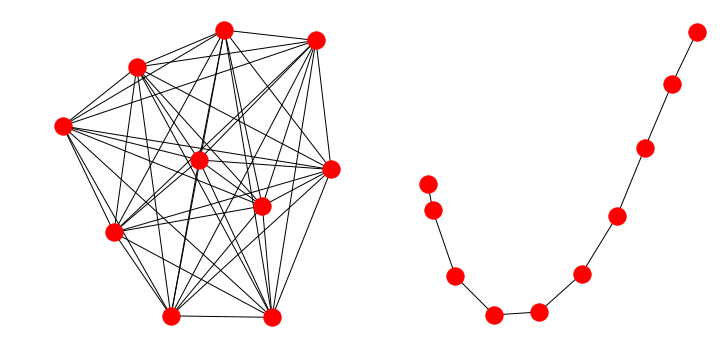

In [51]:
plt.figure(figsize=(12,6),facecolor='w')
plt.subplot(121)
nx.draw(Sld)
plt.subplot(122)
nx.draw(TSld)
plt.show()

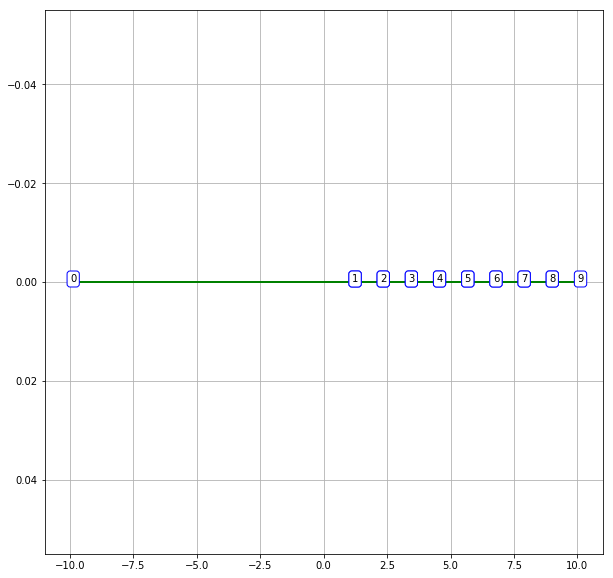

In [52]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSld.edges.data('weight'):
    xctl = [ xld[i], xld[j] ]
    yctl = [ yld[i], yld[j] ]
    plt.annotate( int(node2[i]), xy=(xld[i],yld[i]) , bbox=bbox_props)
    plt.annotate( int(node2[j]), xy=(xld[j],yld[j]) , bbox=bbox_props)
    plt.plot(xld,yld,'.-g')
plt.grid()
p1 = plt.plot(xld,yld, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [53]:
#Calculating the phi funtcion and the mean
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(Rd)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(Rd)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(Rd)
print('Maha=', phi3, dmst3)

L2= 88.8888888889 2.22222222222
L1= 17.7777777778 2.22222222222
Maha= 0.000115470053783 2.22222222222


In [33]:
## Sorting point masses into the 2D space:
xmin = -8.0
xmax = +8.0
ymin = -2.0
ymax = +2.0
npoints = 50
xe = np.zeros(npoints)
ye = np.zeros(npoints)
theta = np.linspace(0,2*np.pi,npoints)
for i in range(npoints):
    xe[i] = uniform(xmin*np.cos(theta[i]),xmax*np.cos(theta[i]))
    ye[i] = uniform(ymin*np.sin(theta[i]),ymax*np.sin(theta[i]))
    
El = (xe,ye)

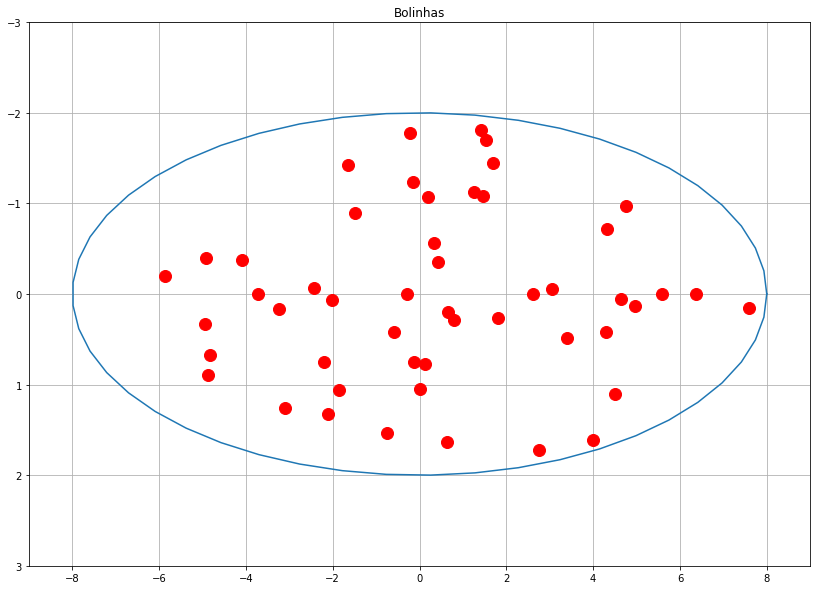

In [37]:
###--------##########################
plt.figure( figsize=(14,10), facecolor='w' )
p1 = plt.plot(xe, ye, 'or' , markersize=12 )
p2 = plt.plot(xmax*np.cos(theta),ymax*np.sin(theta))
plt.title('Bolinhas')
plt.grid()

plt.xlim( xmin-1.0, xmax+1.0 )
plt.ylim( ymin-1.0, ymax+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [35]:
#Calculating the phi funtcion and the mean
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(El)
print('L2=', phi1, dmst1)
phi2, dmst2 = distgraphl1(El)
print('L1=',phi2, dmst2)
phi3, dmst3 = distgraphmaha(El)
print('Maha=', phi3, dmst3)

L2= 4.17805355245 0.630888844996
L1= 12.047997927 0.630888844996
Maha= 4.0297871731e-05 0.630888844996
